In [1]:
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


## PART A - TensorFlow and the Low Level API. [50 Marks]



### Question 1_2_1
The second task will introduce additional layers of ReLu based neurons before the
SoftMax layer in order to build a more complex neural network model. 

Using TensorFlow’s low level API with autodiff build a multi-layer neural network for
tackling this problem. You should build on the code you have implemented in Q1(i).
More specifically you should implement and evaluate the following two alternative
architectures:

-  Layer 1: 300 neurons (ReLu activation functions).
-  Layer 2: Softmax Layer (from Q1 (i))

In [2]:
'''
Function from the assignment brief with modified return type
'''
def loadData():
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # load the training and test data    
    (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

    # reshape the feature data
    #print(tr_x.shape)

    tr_x = tr_x.reshape(tr_x.shape[0], 784)
    te_x = te_x.reshape(te_x.shape[0], 784)
    #print(tr_x.shape)

    # noramlise feature data
    tr_x = tr_x / 255.0
    te_x = te_x / 255.0

    print( "Shape of training features ", tr_x.shape)
    print( "Shape of test features ", te_x.shape)


    # one hot encode the training labels and get the transpose
    tr_y = np_utils.to_categorical(tr_y,10)
    tr_y = tr_y.T
    print ("Shape of training labels ", tr_y.shape)

    # one hot encode the test labels and get the transpose
    te_y = np_utils.to_categorical(te_y,10)
    te_y = te_y.T
    print ("Shape of testing labels ", te_y.shape)
    #Returning tensor flow variables
    return  tf.Variable(tr_x, dtype=tf.float32),  \
            tf.Variable(tr_y,  dtype=tf.float32), \
            tf.Variable(te_x,  dtype=tf.float32), \
            tf.Variable(te_y,  dtype=tf.float32)

#### Please make sure your code includes the following three functions:

In your report include your forward_pass function function for both of the above
network architectures. 

In [3]:
@tf.function
def forward_pass(x, w2, b2, w1, b1):
    #ReLu Layer 1 (Hidden)
    t1 = tf.add(tf.matmul(x, w1), b1)
    relu1 = tf.math.maximum(t1, 0)
    #Softmax Layer 2
    t = tf.exp(tf.add(tf.matmul(relu1, w2), b2))
    sm =  t / tf.reduce_sum(t, axis= 1, keepdims=True)
    return sm

In [4]:

@tf.function
def cross_entropy(predicted, y):
    ce = -tf.reduce_sum(tf.transpose(y) * tf.math.log(predicted), axis=1)
    loss = tf.reduce_mean(ce)
    return loss

In [5]:
#Implementation inpired from the link below to the tensor flow guide.
#https://www.tensorflow.org/guide/keras/train_and_evaluate
def calculate_accuracy(predicted, y):
    #Either transpose or run argmax on axis 1
    predicted = tf.argmax(predicted, axis=1)
    y = tf.argmax(y, axis=0)
    values = tf.cast(y, tf.int32) == tf.cast(predicted, tf.int32)
    values = tf.cast(values, tf.float32)
    accuracy = tf.reduce_mean(values)
    return accuracy


In [6]:
'''
Main run function
'''
def run(iterations, optimiser, numberOfClasses, dataSize):
    #Initialise Relu layer 1 weights
    w1 = tf.Variable(tf.random.normal([dataSize, 300], mean=0.0, stddev=0.01, dtype=tf.float32))
    #Initialise layer 1 bias
    b1 = tf.Variable(tf.zeros([1, 300]))
    #Initialise Softmax layer 2 weights
    w2 = tf.Variable(tf.random.normal([300, numberOfClasses], mean=0.0, stddev=0.01, dtype=tf.float32))
    #Initialise layer 2 bias
    b2 = tf.Variable(tf.zeros([1, numberOfClasses]))
    for i in range(iterations):
        with tf.GradientTape() as tape:
            #Run forward pass, supply all the weights for l1 and l2 and biases
            predictions = forward_pass(tr_x, w2, b2, w1, b1)
            #Calculate loss
            loss = cross_entropy(predictions, tr_y)
            #Run forward pass on test data
            testPredictions = forward_pass(te_x, w2, b2, w1, b1)
            #Capture stats
            history['trainAccuracy'].append(calculate_accuracy(predictions, tr_y).numpy())
            history['trainLoss'].append(loss.numpy())
            history["testAccuracy"].append(calculate_accuracy(testPredictions, te_y).numpy())
            history["testLoss"].append(cross_entropy(testPredictions, te_y).numpy())
        #Execute gradient descent wrt all the weights and biases
        gradients = tape.gradient(loss, [w2, b2, w1, b1])
        optimiser.apply_gradients(zip(gradients, [w2, b2, w1, b1]))

In [7]:
tr_x, tr_y, te_x, te_y = loadData()

Shape of training features  (60000, 784)
Shape of test features  (10000, 784)
Shape of training labels  (10, 60000)
Shape of testing labels  (10, 10000)


In [8]:
#Numer of classe is 10 as per the dataset
numberOfClasses = 10
#Run for 100 iterations
epochs = 100
accuracy = {}
#Initialise stats arrays
history ={}
history["trainAccuracy"] = []
history['trainLoss'] = []
history["testAccuracy"] = []
history['testLoss'] = []
#Load data
tr_x, tr_y, te_x, te_y = loadData()
inputSize = tr_x.shape[1]
#Run model 
run(epochs, tf.keras.optimizers.Adam(), numberOfClasses, tr_x.shape[1])


Shape of training features  (60000, 784)
Shape of test features  (10000, 784)
Shape of training labels  (10, 60000)
Shape of testing labels  (10, 10000)


Summarise and visualise the results:

Train accuracy: 0.8469167
Test accuracy: 0.8308
Train loss: 0.44357252
Test loss: 0.47802123




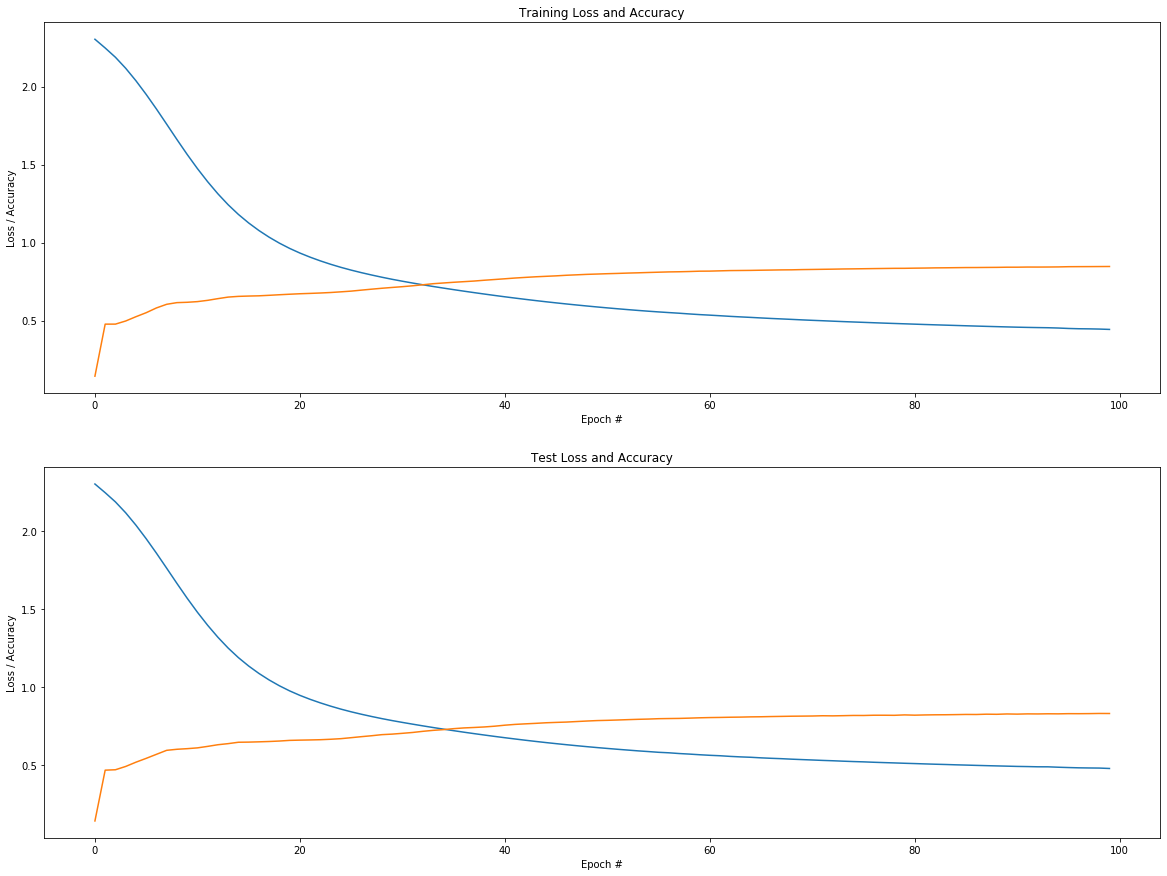

In [9]:
print('Train accuracy:', history['trainAccuracy'][-1])
print('Test accuracy:', history['testAccuracy'][-1])
print('Train loss:', history['trainLoss'][-1])
print('Test loss:', history['testLoss'][-1])
print("\n")


plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.plot(history['trainLoss'])
plt.plot(history['trainAccuracy'])
plt.xlabel('Epoch #')
plt.ylabel('Loss / Accuracy')
plt.title("Training Loss and Accuracy")

plt.subplot(2, 1, 2)
plt.plot(history['testLoss'])
plt.plot(history['testAccuracy'])
plt.xlabel('Epoch #')
plt.ylabel('Loss / Accuracy')
plt.title("Test Loss and Accuracy")


plt.show()

#### Validation:
Now, run same in Keras for validation purpose.
The outcomes should be similar.

In [10]:
#Visualise output from Keras
def visualiseOutput(history, results):
    print("\n")
    print("Test Loss: ", results[0])
    print("Test Accuracy: ", results[1])
    print("\n")
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
   
    plt.title('Training Loss and Accuracy')
    plt.ylabel('Loss/Accuracy')
    plt.xlabel('Epoch #')
    plt.legend(['train loss', 'val loss', 'train acc', 'val acc'], loc='lower left')
    plt.show()

Shape of training features  (60000, 784)
Shape of test features  (10000, 784)
Shape of training labels  (10, 60000)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________

10000/10000 [==============================] - 1s 60us/sample - loss: 0.4322 - accuracy: 0.8488


Test Loss:  0.43222522387504575
Test Accuracy:  0.8488




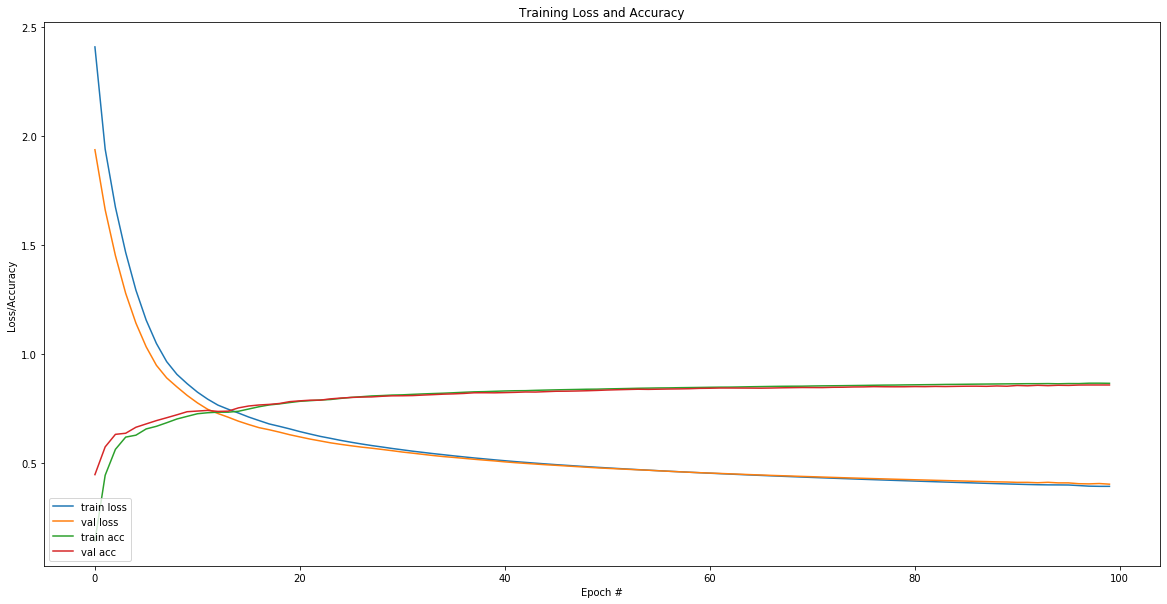

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# load the training and test data    
(tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

# reshape the feature data
#print(tr_x.shape)

tr_x = tr_x.reshape(tr_x.shape[0], 784)
te_x = te_x.reshape(te_x.shape[0], 784)
    #print(tr_x.shape)

# noramlise feature data
tr_x = tr_x / 255.0
te_x = te_x / 255.0

print( "Shape of training features ", tr_x.shape)
print( "Shape of test features ", te_x.shape)


# one hot encode the training labels and get the transpose
tr_y = np_utils.to_categorical(tr_y,10)
tr_y = tr_y.T
print ("Shape of training labels ", tr_y.shape)

# one hot encode the test labels and get the transpose
te_y = np_utils.to_categorical(te_y,10)
te_y = te_y.T

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(300, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
hist = model.fit(tr_x, tf.transpose(tr_y), epochs=100, batch_size=60000, validation_split=0.1, verbose=0)
print('')
results = model.evaluate(te_x, tf.transpose(te_y))
visualiseOutput(hist, results)